In [2]:
import sys
sys.path.append('../code/')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import nibabel as nib

from nilearn import datasets, plotting
from nilearn.maskers import NiftiMapsMasker

import pickle
import utils

device = torch.device("cuda:0")
# device = torch.device("cpu")

In [3]:
with open('../data/bottleneck_sweep_results.pkl', 'rb') as f:
    sweep_dict = pickle.load(f)

In [16]:
train_mean, train_std = list(), list()
test_mean, test_std = list(), list()

bottleneck_values = [4,8,12,16,20,24,28,32]

for bottleneck_val in bottleneck_values:
    train_loss, test_loss = list(), list()
    for fold in range(5):
        train_loss.append(sweep_dict[f'bottleneck_{bottleneck_val}'][f'fold_{fold}']['min_train_loss'])
        test_loss.append(sweep_dict[f'bottleneck_{bottleneck_val}'][f'fold_{fold}']['min_validation_loss'])
    
    train_mean.append(np.mean(train_loss))
    train_std.append(np.std(train_loss))

    test_mean.append(np.mean(test_loss))
    test_std.append(np.std(test_loss))


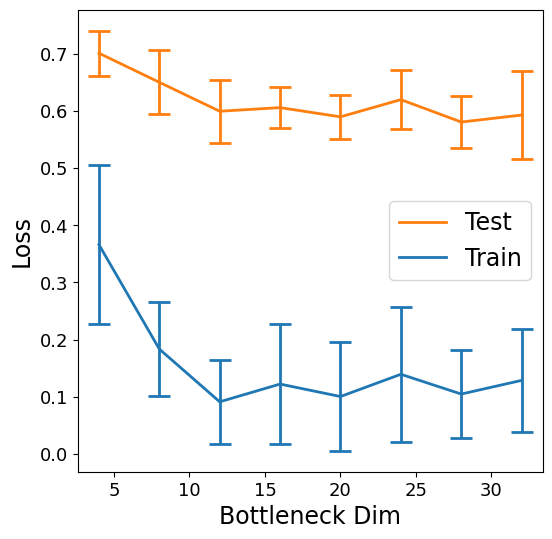

In [33]:
labelsize = 17
ticksize=13
capsize = 8
linewidth=2

train_color = 'C0'
test_color = 'C1'

plt.figure(figsize=(6,6))
plt.errorbar(x=bottleneck_values, y=train_mean, yerr=train_std, capsize=capsize, linewidth=linewidth, capthick=linewidth, color=train_color)
plt.errorbar(x=bottleneck_values, y=test_mean, yerr=test_std, capsize=capsize, linewidth=linewidth, capthick=linewidth, color=test_color)

plt.plot([], [], label='Test', linewidth=linewidth, color=test_color)
plt.plot([], [], label='Train', linewidth=linewidth, color=train_color)

plt.xlabel('Bottleneck Dim', fontsize=labelsize)
plt.xticks(fontsize=ticksize)
plt.ylabel('Loss', fontsize=labelsize)
plt.yticks(fontsize=ticksize)

plt.legend(fontsize=labelsize)